# Lending Club Case Study

### Importing the libraries

In [328]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')
sns.set(style='whitegrid')

### Loading the dataset

In [329]:
# loading the dataset
data=pd.read_csv("loan.csv")

## Data Understanding

### Shape of the given dataset

In [330]:
data.shape

(39717, 111)

### Data type of columns

In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning

### Identifying and removing columns with more than 50% NULL values

In [332]:
#Identifying the columns having more than 50% of null values 
def null_percent(data):
    output = round(data.isnull().sum()/len(data.index)*100,2)
    return output
null_col = null_percent(data)
null_col


id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [333]:
null_col_morethan_50 = null_col[null_col>50]
print("Number of column with more than 50% NULL values:",len(null_col_morethan_50))

Number of column with more than 50% NULL values: 57


In [334]:
# Dropping the 57 columns having more than 50% NULL values
data = data.drop(null_col_morethan_50.index, axis =1)

In [335]:
# Shape of the dataframe after removing the columns with more than 50% NULL values
data.shape

(39717, 54)

In [336]:
data = data.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [337]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
len(behaviour_var)

21

In [338]:
# Removing behaviour variables from analysis
data = data.drop(behaviour_var, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [339]:
data.var()

id                            4.439202e+10
member_id                     7.058496e+10
loan_amnt                     5.560194e+07
funded_amnt                   5.165640e+07
funded_amnt_inv               5.081481e+07
installment                   4.362871e+04
annual_inc                    4.069645e+09
dti                           4.460361e+01
collections_12_mths_ex_med    0.000000e+00
policy_code                   0.000000e+00
acc_now_delinq                0.000000e+00
chargeoff_within_12_mths      0.000000e+00
delinq_amnt                   0.000000e+00
pub_rec_bankruptcies          4.174831e-02
tax_liens                     0.000000e+00
dtype: float64

In [340]:
# dropping columns with zero variance
var_0=['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']

In [341]:
df=data.drop(var_0,axis=1)

In [342]:
df.shape

(39717, 23)

In [343]:
# Dropping id and member id columns as they are unique
df=df.drop(['id','member_id'],axis=1)

In [344]:
df.shape

(39717, 21)

### Dropping records with loan status as current

In [345]:
# Counting the values in the Loan status column
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [346]:
# Dropping the records with loan status as current since we dont need them
df = df.loc[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [347]:
# Shape of the dataframe after dropping the records with loan status as current
df.shape

(38577, 21)

In [348]:
# Assigning values to loan_status: 0 to Fully paid and 1 t0 Charged Off 
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))
df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

### Cleaning term column

In [349]:
df['term'].value_counts(dropna=False)

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [350]:
df['term'].astype('string')

0         36 months
1         60 months
2         36 months
3         36 months
5         36 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 38577, dtype: string

In [351]:
df['term'] = df['term'].apply(lambda s: np.int8(s.split()[0]))

In [352]:
df['term'].value_counts()

36    29096
60     9481
Name: term, dtype: int64

In [353]:
# Normalizing the loan status column
df['loan_status'].value_counts(normalize=True, dropna=False)

0    0.854136
1    0.145864
Name: loan_status, dtype: float64

### Cleaning the interest rate column

In [354]:
# Removing percentage symbol from the column values
def clean_int_rate(val):
    return float(val.replace("%"," "))
df['int_rate']=df['int_rate'].apply(clean_int_rate)
df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64

### Cleaning Employment length column

In [355]:
# Dropping the missing values from the Employmeny length column 
df= df[~df['emp_length'].isnull()]
import re
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))

### Cleaning Annual income column

In [356]:
#Applying log to the annual income column
df['log_annual_inc'] = df['annual_inc'].apply(lambda x: np.log10(x+1))

In [357]:
df['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 37544, dtype: object

### Cleaning issue_d column

In [358]:
#Create separate columns for year and month
df['month']=df['issue_d'].apply(lambda x:x[:3])
df['year']=df['issue_d'].apply(lambda x:x[4:])
df['year']

0        11
1        11
2        11
3        11
5        11
         ..
39712    07
39713    07
39714    07
39715    07
39716    07
Name: year, Length: 37544, dtype: object

In [359]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'desc', 'purpose', 'dti',
       'initial_list_status', 'pub_rec_bankruptcies', 'log_annual_inc',
       'month', 'year'],
      dtype='object')

# Data Analysis

## Univariate Categorical analysis - countplots,value_counts,piecharts

In [284]:
#Value counts
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

#### There are 32145 fully paid loans and 5399 Charged Off loans

<Axes: xlabel='year', ylabel='count'>

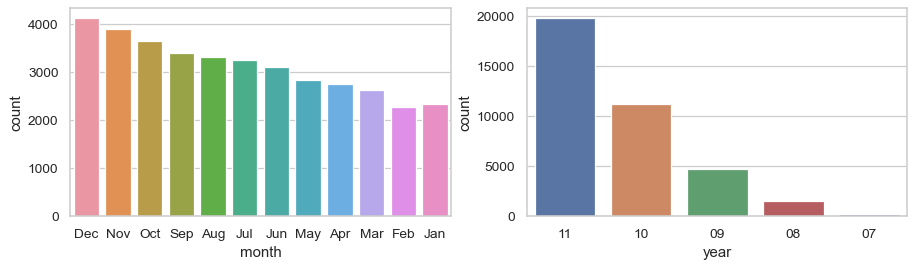

In [285]:
# Months 
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
sns.countplot(x='month',data=df,ax=ax1)
sum=df.groupby('month').sum()
sns.countplot(x='year',data=df,ax=ax2)

#### More number of loans are more in the month of december and in the year 2011

Text(0.5, 1.0, 'Purpose vs Charged Off rate')

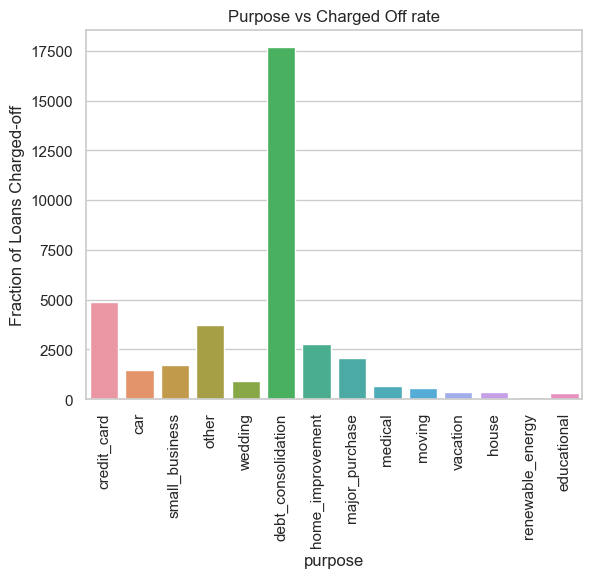

In [286]:
# Purpose
sns.countplot(x='purpose',data=df)
plt.ylabel('Fraction of Loans Charged-off')
plt.xticks(rotation ='vertical')
plt.title('Purpose vs Charged Off rate')

In [287]:
#### More loans are issued for the purpose debt consolidation

Text(0.5, 1.0, 'Grade')

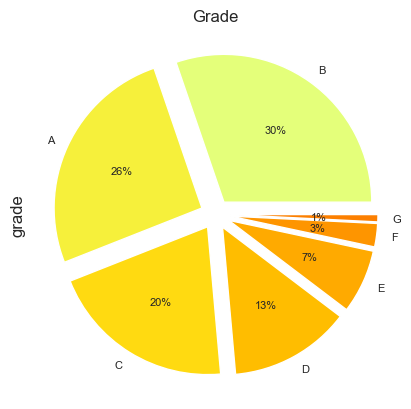

In [288]:
# Grade
myex=[0.1,0.1,0.1,0.1,0.1,0.1,0.1]

df['grade'].value_counts().plot.pie(autopct="%.0f%%", colormap='Wistia',explode=myex, textprops={"fontsize":8})
plt.title("Grade")

#### More number of loans falls in grade B

<Axes: xlabel='emp_length', ylabel='Count'>

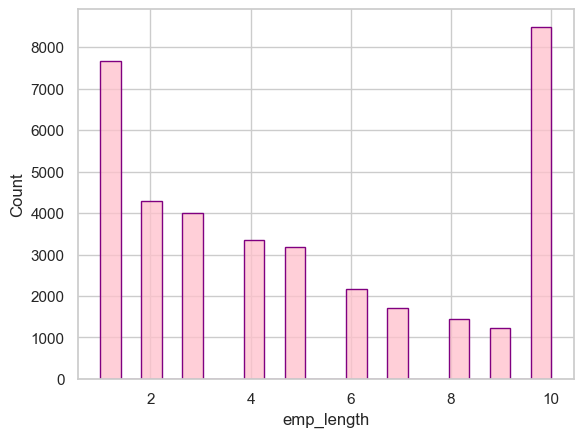

In [289]:
sns.histplot(x='emp_length', color='pink',edgecolor='purple',data=df)

#### Most of the employees have the employee length as 10 years or above 

In [290]:
df['annual_inc'].astype('int')

0         24000
1         30000
2         12252
3         49200
5         36000
          ...  
39712    110000
39713     18000
39714    100000
39715    200000
39716     22000
Name: annual_inc, Length: 37544, dtype: int32

<Axes: xlabel='loan_status', ylabel='annual_inc'>

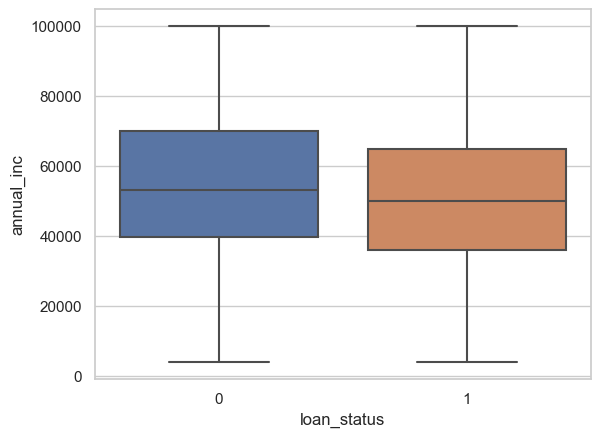

In [291]:
temp = df[df['annual_inc'] < 100000]
#Analyze the relationship between loan status and salary
sns.boxplot(x = 'loan_status', y = 'annual_inc' ,data=temp)

In [292]:
# default Charged Off rate
round(np.mean(df['loan_status']), 2)

0.14

## Bivariate Analysis

<Axes: >

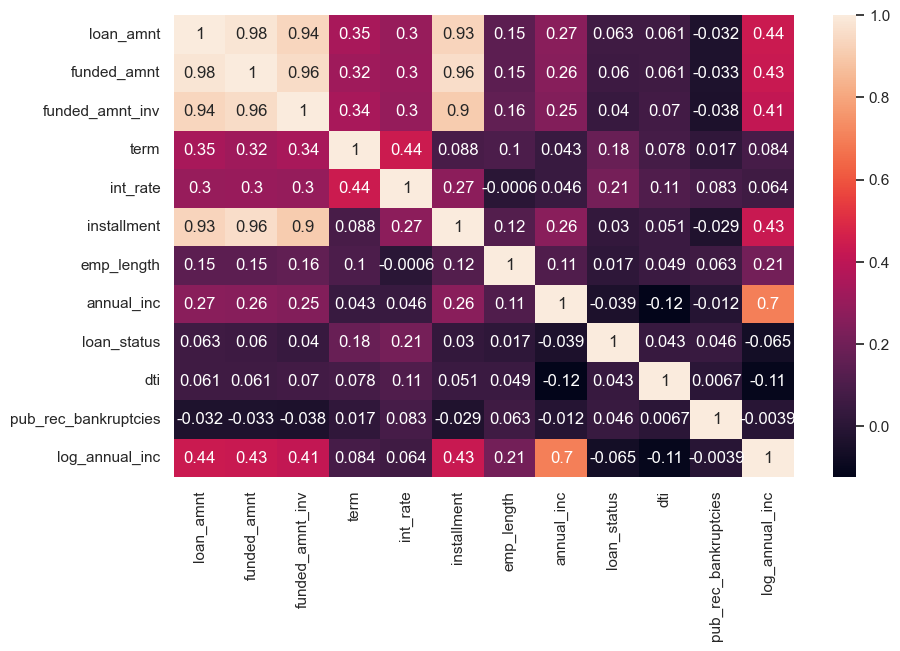

In [293]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

#### The above heatmap describes the correlation between all the numerical variables. Ex.The installment has high correltion with loan amount,funded amount and funded_amnt_inv. 

[Text(0, 0, 'Fully Paid'), Text(1, 0, 'Charged Off')]

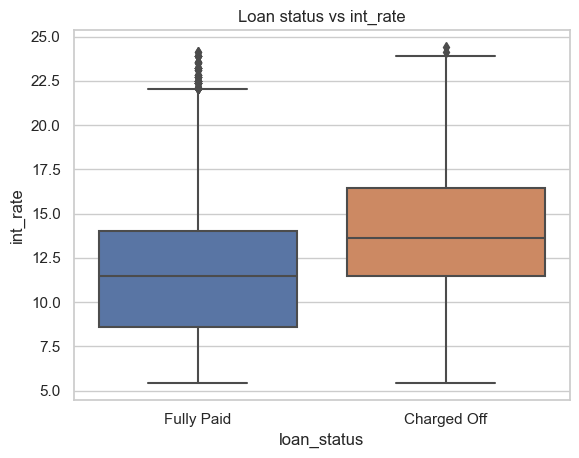

In [294]:
# Loan status vs int_rate
ax=sns.boxplot(x = 'loan_status', y = 'int_rate' ,data=df)
plt.title('Loan status vs int_rate')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Fully Paid','Charged Off'])

#### Charged-off loans tend to have much higher interest rates. 

[Text(0, 0, 'Fully Paid'), Text(1, 0, 'Charged Off')]

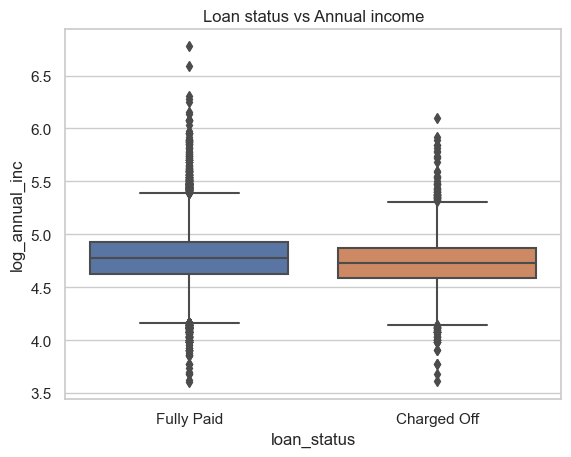

In [297]:
# Loan status vs Annual income
ax=sns.boxplot(x = 'loan_status', y = 'log_annual_inc' ,data=df)
plt.title('Loan status vs Annual income')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Fully Paid','Charged Off'])

 #### Individuals with higher income are more likely to pay off their loans

[Text(0, 0, 'Fully Paid'), Text(1, 0, 'Charged Off')]

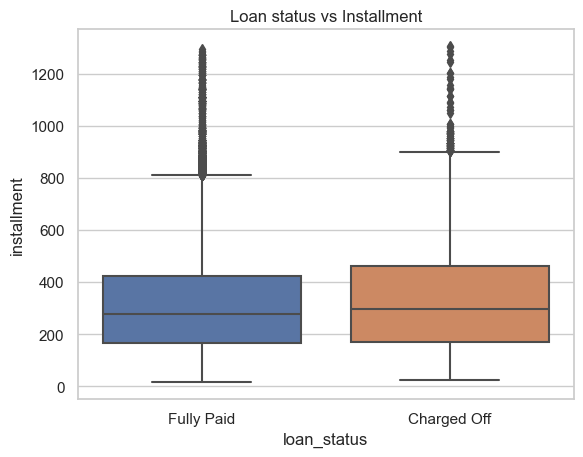

In [224]:
# Loan status vs Installment
ax=sns.boxplot(x = 'loan_status', y = 'installment' ,data=df)
plt.title('Loan status vs Installment')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Fully Paid','Charged Off'])

#### Charged-off loans tend to have higher installments. 


[Text(0, 0, 'Fully Paid'), Text(1, 0, 'Charged Off')]

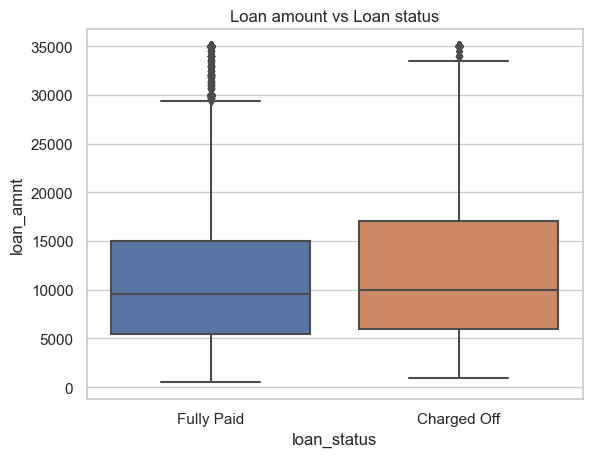

In [225]:
# Loan amount vs Loan status
ax=sns.boxplot(x = 'loan_status', y = 'loan_amnt' ,data=df)
plt.title('Loan amount vs Loan status')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Fully Paid','Charged Off'])

#### Charged-off loans tend to have higher loan amounts

### Categorical vs Categorical

Text(0.5, 1.0, 'Charge-off Rate by Ownership')

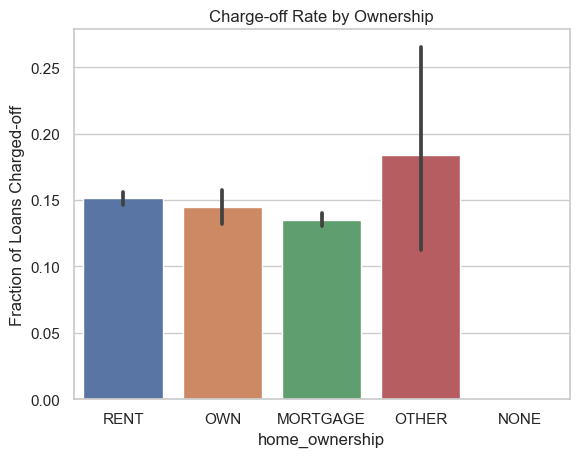

In [298]:
ax=sns.barplot(x='home_ownership', y='loan_status', data=df)
plt.ylabel('Fraction of Loans Charged-off')
plt.title('Charge-off Rate by Ownership' )


#### No significant variance in home ownership incase of defaulters

Text(0.5, 1.0, 'Charged Off Rate by verification_status')

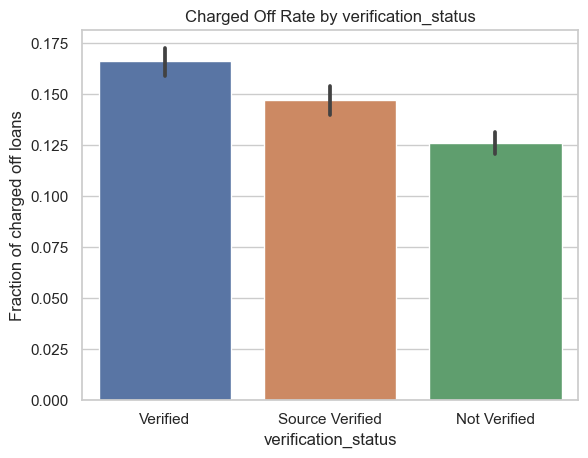

In [299]:
# Verfication Status
sns.barplot(x='verification_status', y='loan_status',data=df)
plt.ylabel('Fraction of charged off loans')
plt.title('Charged Off Rate by verification_status' )

#### It is observed that there is higher fraction of Fully paid loans that are not verified and the fraction of not verified loans are more in charged off loans

Text(0.5, 1.0, 'Purpose vs Charged Off rate')

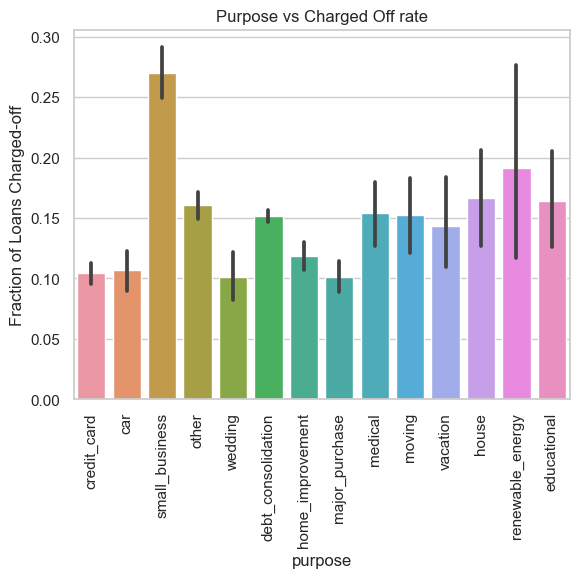

In [300]:
# Purpose
sns.barplot(x='purpose', y='loan_status',data=df)
plt.ylabel('Fraction of Loans Charged-off')
plt.xticks(rotation ='vertical')
plt.title('Purpose vs Charged Off rate')

#### Higher number of charged off loans have the purpose as small_business

Text(0.5, 1.0, 'Charge-off Rate vs Term')

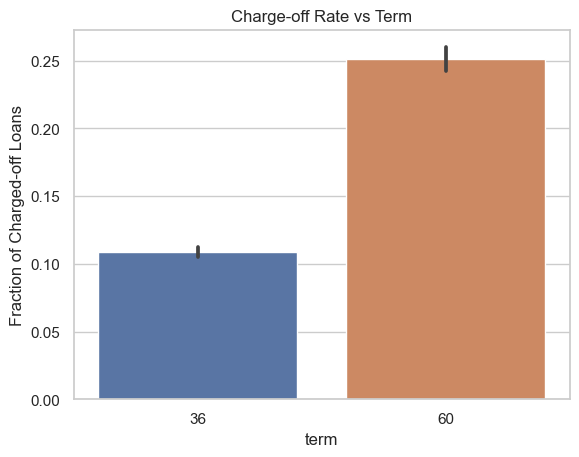

In [301]:
sns.barplot(x='term', y='loan_status', data=df)
plt.ylabel('Fraction of Charged-off Loans')
plt.title('Charge-off Rate vs Term' )

#### Defaulters are more for the term 60 months

Text(0.5, 1.0, 'Grade vs Charged Off Loans')

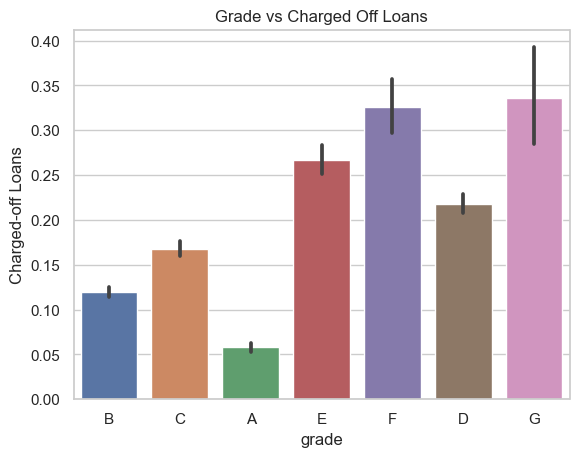

In [302]:
# Grade
sns.barplot(x='grade', y='loan_status', data=df)
plt.ylabel('Charged-off Loans')
plt.title('Grade vs Charged Off Loans')

#### Defaulters are more in the grade G

### Segmented Analysis

In [303]:
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

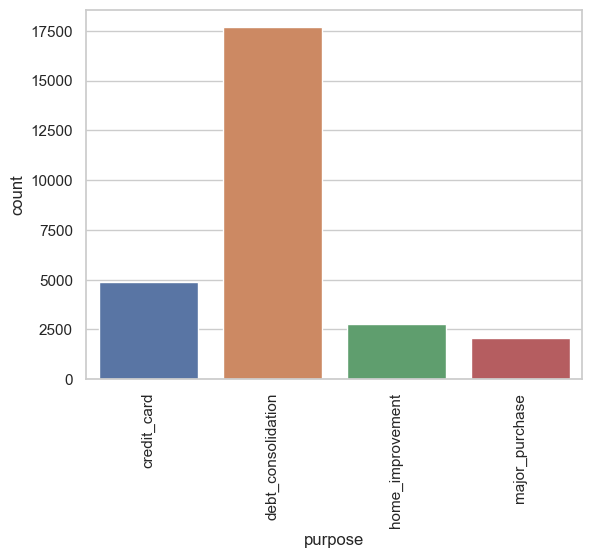

In [304]:
# plotting number of loans by purpose
sns.countplot(x=df['purpose'])
plt.xticks(rotation='vertical')
plt.show()

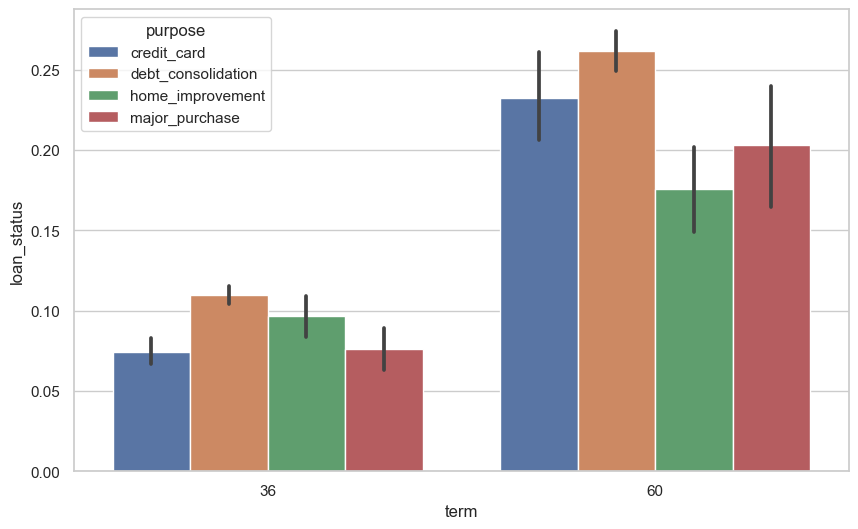

In [305]:
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

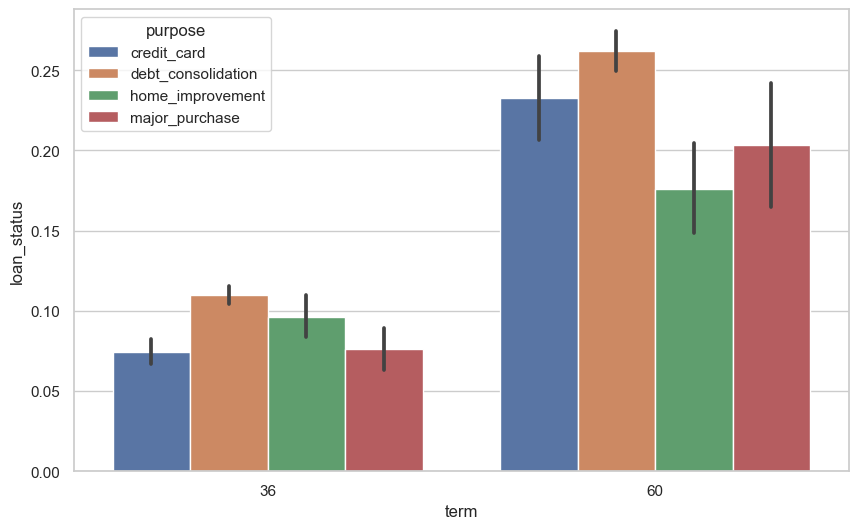

In [306]:
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()
plot_segmented('term')

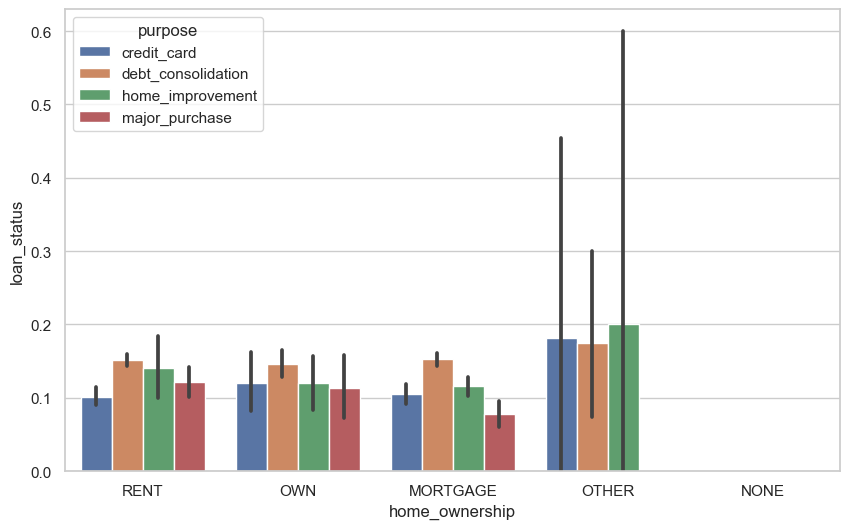

In [307]:
# home ownership
plot_segmented('home_ownership')

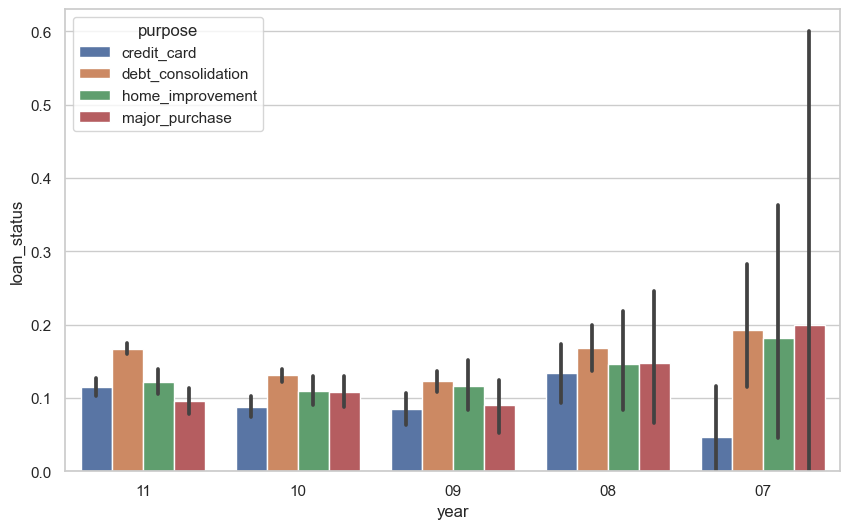

In [308]:
# year
plot_segmented('year')

In [309]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

In [310]:
# variation of default rate across annual_inc
df.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.157966
medium       0.130075
very high    0.101570
high         0.097749
Name: loan_status, dtype: float64

In [311]:
def diff_rate(cat_var):
    default_rates = df.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates,diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)

annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


#### There is a 6% increase in default rate as you go from high to low annual income.